![example](images/director_shot.jpeg)

# Microsoft Movie Studio

**Authors:** Mengyu Jackson
***

## Overview

This repo helps to explore relationships between runtime, budget, genre, TMDB average vote score, and ROI. The best movies for optimizing ROI are short, low budget horror/thriller movies. These tend to have lower reviews however.The best movies for optimizing vote score and total profit are long, high budget, Action/SciFi or Action/Adventure movies. These still have ROI much higher than average movie, but may require expensive IP. Short, high budget, Animation/Adventure/Comedy movies also do very well according to all three metrics (ROI, total profit, and vote score)


## Business Problem

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

***
Questions to consider:
* Is movie making money? Yes, more movie making money than losing money
    few chart show result by number of moive, budget, gross.
* What type movie making more money? What's the genre, duration(how long), budget, studio, director and writer, actor. experienc, etc.
* What are the business's pain points related to this project? Total lack of direction
* How did you pick the data analysis question(s) that you did? Microsoft definitely has plenty of money to jump in on the big budget movies immediately, but without knowing the quality of their other investment opportunities and given they have an exisitng brand that is very valuable, I wanted to present a balanced approach that considers ROI, total profit, and also "quality".
* Why are these questions important from a business perspective? 
 * ROI is important to decide which movie making ventures make sense to fund vs. using the money in other Microsoft projects. 
 * Total profit is important in understanding the total amount of money that can be made making movies.
 * Vote average may be important to Microsoft's brand, depending on how clearly the movie studio is associated with the parent company. Being associated with cheap or low quality things may damage Microsoft overall, even if the movies make them more money.
***

## Data Understanding

In the folder zippedData in the associated GitHub repository are movie datasets from:

   * Box Office Mojo
   * IMDB
   * Rotten Tomatoes
   * TheMovieDB.org

***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable? 
 * ROI, profit, and vote_average.
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import the visualization package you created
import code.visualizations as viz
import code.data_preparation as prep

## Data Preparation

Group data from diffent resourse to 'clean_data' which have title, cost, gross, studio, year.


***
Questions to consider:
* Were there variables you dropped or created?
 * We dropped most variables, except Gross, budget, genres, runtime, studio.
 * We created ROI and profit based on Gross and Budget.
* How did you address missing values or outliers?
 * We excluded some outliers, and we only analyzed rows which had no missing values.
* Why are these choices appropriate given the data and the business problem?
 * To guide initial, high level decisions about the studio, we wanted to get a sense of trends in large sections of the movie industry which are applicable to every movie Microsoft may make, rather than dive into specific actors, directors, or writers (who can only work on one movie at a time).
***

In [3]:
# Single resource data: bom, tmdb, tn. 
# Cleaned
bom = pd.read_csv("data/zippedData/bom.movie_gross.csv")
clean_bom = prep.clean_bom(bom)
tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv")
clean_tmdb_movies = prep.clean_tmdb_movies(tmdb_movies)
tn_movie_budgets = pd.read_csv("data/zippedData/tn.movie_budgets.csv")
clean_tn_movie_budgets = prep.clean_tn_movie_budgets(tn_movie_budgets)

# read rt file
# cleaned
rt_info = pd.read_csv("data/zippedData/rt.movie_info.tsv", sep='\t')
rt_reviews = pd.read_csv("data/zippedData/rt.reviews.tsv", sep='\t', encoding='unicode_escape')
rt_something = rt_info.groupby(['genre','runtime','theater_date']).size().reset_index().rename(columns={0:'count'})
clean_rt_info = prep.clean_rt_info(rt_info)

# read imdb file
imdb_name_basics = pd.read_csv("data/zippedData/name.basics.csv")
imdb_title_basics = pd.read_csv("data/zippedData/title.basics.csv")
imdb_title_crew = pd.read_csv("data/zippedData/title.crew.csv")
imdb_title_ratings = pd.read_csv("data/zippedData/title.ratings.csv")
imdb_title_principals = pd.read_csv("data/zippedData/title.principals.csv")

In [4]:
# joinn tconst: imdb_title_basics, imdb_title_crew, imdb_title_ratings
join_imdb_tconst = prep.join_imdb(imdb_title_basics, imdb_title_crew, imdb_title_ratings)
# join nconst: imbd_name_basics, imbd_title_principals
join_imdb_nconst = imdb_name_basics.set_index('nconst').join(imdb_title_principals.set_index('nconst'), lsuffix="_basics", rsuffix="_principals", how ='inner')
# join clean_bom and clean_tn_movie_budgets
cleaned_data = prep.join_bom_tn_budgets(clean_bom, clean_tn_movie_budgets)
# join data: single rescurce complete
cleaned_data = cleaned_data.join(clean_tmdb_movies, lsuffix="_cleaned_data", rsuffix="_tmdb", how ='inner')
# Join join_imdb_tconst and cleaned_data
cleaned_data = prep.join_imdb_tconst_cleaned_data(join_imdb_tconst, cleaned_data)
# # Create new Column 'ROI', 'profit_status'
cleaned_data = prep.create_column(cleaned_data)

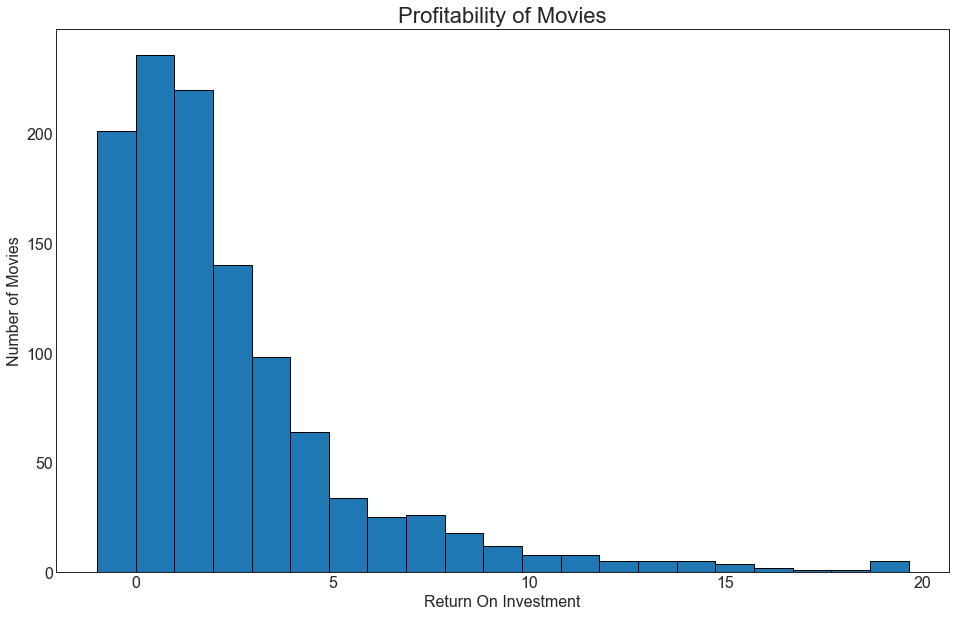

In [5]:
viz.profitability_movies(cleaned_data)

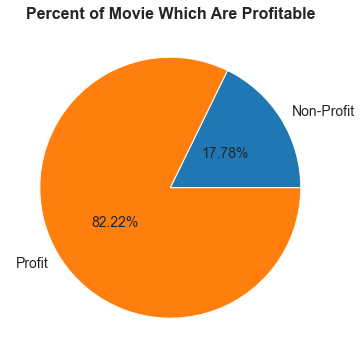

In [6]:
# Question: Is movie making money? 
# Answer: Yes, more movie making money than losing money.
viz.number_movie_pie(cleaned_data)

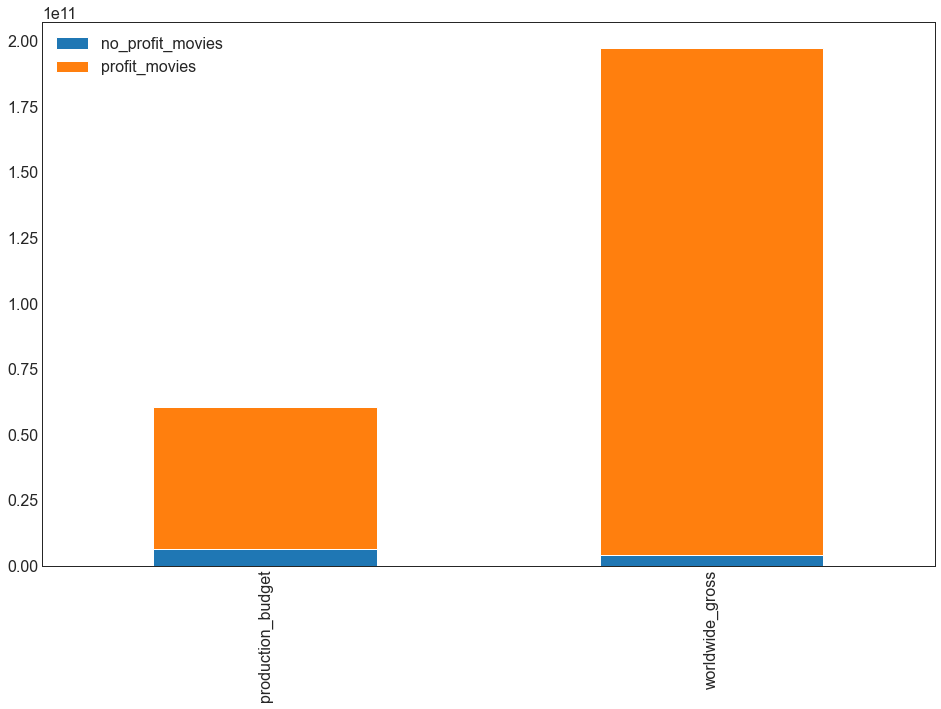

In [7]:
# Question: Is movie making money? 
# Answer: Yes, more movie making money than losing money.
# few chart show result by number of moive, budget, gross.
viz.movies_profit(cleaned_data)

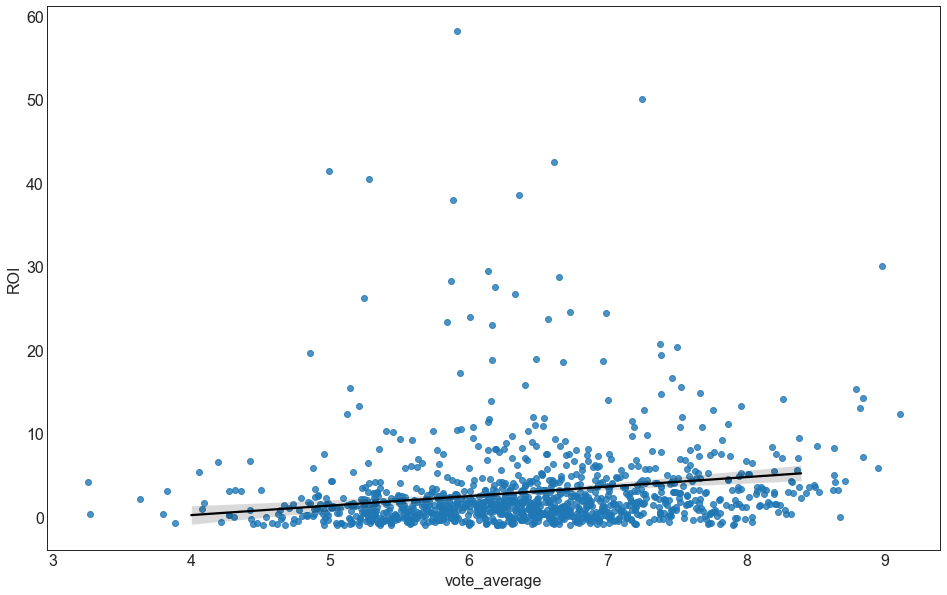

In [8]:
# Does higher vote_average mean higher ROI?
viz.vote(cleaned_data)
# Answer: Correlation is weak, but appears to be negative(!

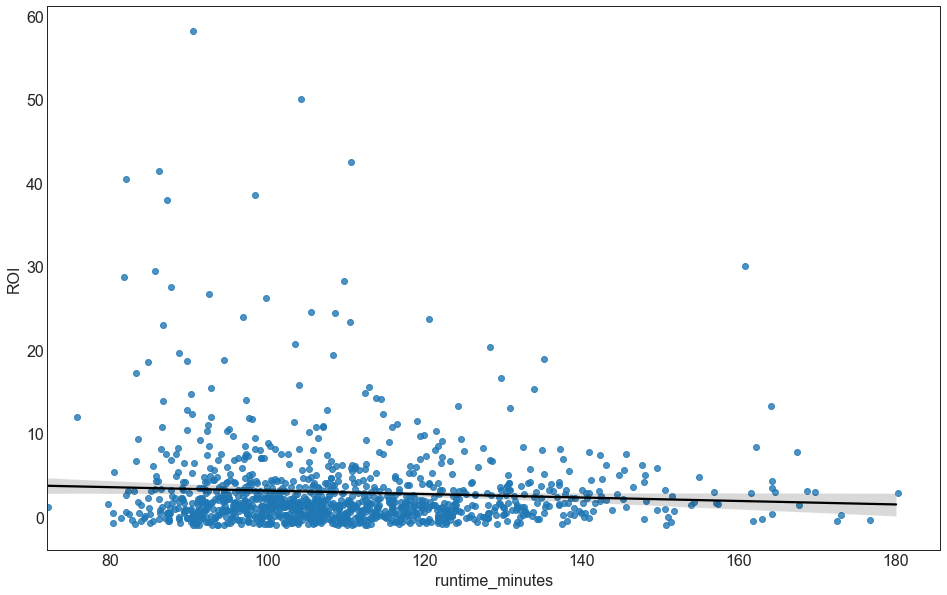

In [9]:
# Question: Does higher runtime mean higher ROI?
viz.runtime(cleaned_data.loc[cleaned_data['runtime_minutes'] > 70])
# Answer: No, shorter movies seem to make more money.

Text(0.5, 1.0, 'Overall: Profit vs Movie Runtime Analysis')

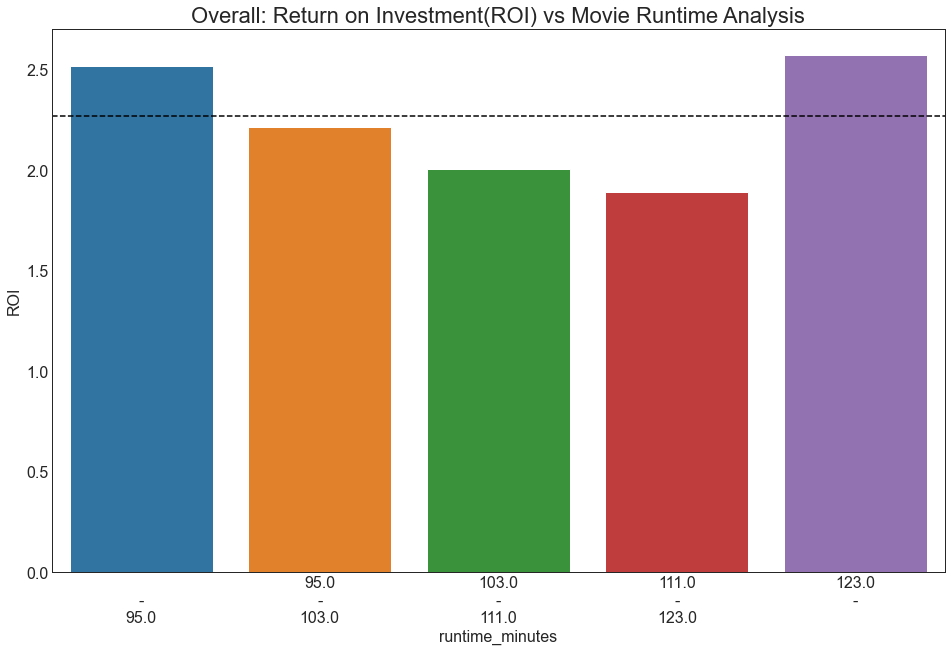

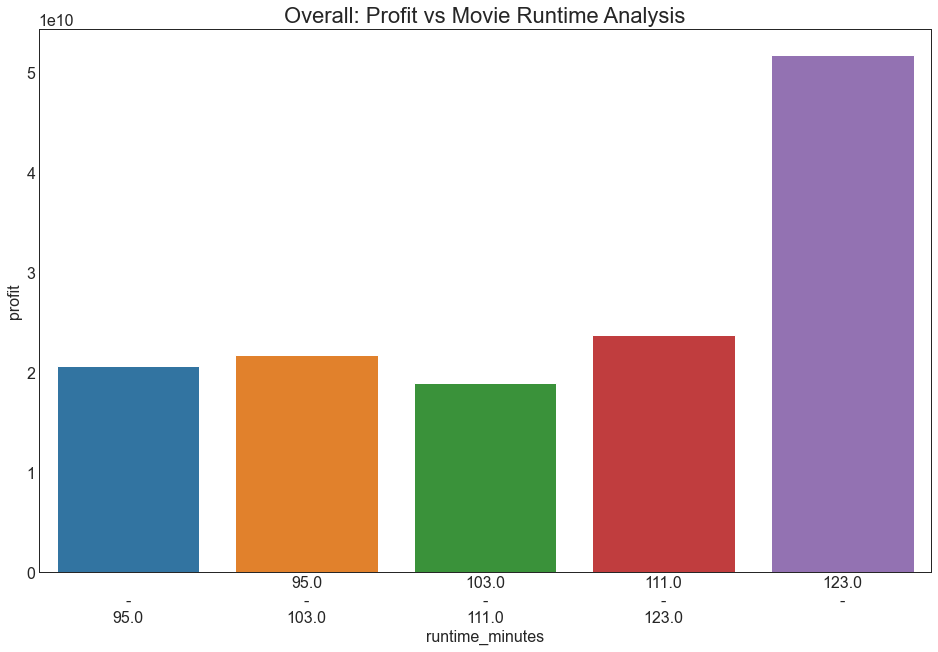

In [10]:
# bin_summary, quantile_cutoffs, ax = viz.column_quantile_analysis(cleaned_data, "runtime_minutes")
# quantile_cutoffs
bin_summary, roi_ax, profit_ax = viz.column_quantile_analysis2(cleaned_data, "runtime_minutes")
roi_ax.set_title("Overall: Return on Investment(ROI) vs Movie Runtime Analysis")
roi_ax.axhline(viz.calculate_average_roi(cleaned_data), ls='--', color ='black')
profit_ax.set_title("Overall: Profit vs Movie Runtime Analysis")

In [11]:
# set range
lb = cleaned_data[(cleaned_data["production_budget"] < 5.57e6) & (cleaned_data["production_budget"] > 1e6)]
lb_sm = lb[lb["runtime_minutes"] < 90]
lb_lm = lb[lb["runtime_minutes"] >118]

hb = cleaned_data[(cleaned_data["production_budget"] > 5.8e7)]
hb_sm = hb[hb["runtime_minutes"] < 98]
hb_lm = hb[hb["runtime_minutes"] > 132]

sm = cleaned_data[(cleaned_data["runtime_minutes"] < 95)]
lm = cleaned_data[(cleaned_data["runtime_minutes"] > 128)]

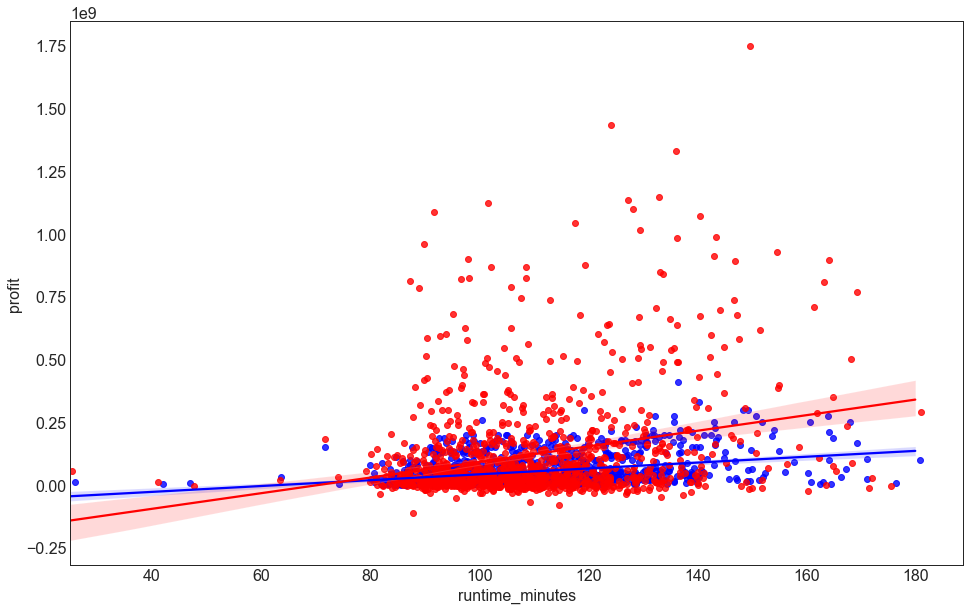

In [12]:
# Questions? Why does shorter runtime mean higher ROI?
# Hypothesis: Lower cost for shorter movies; similar profit.
viz.cost(cleaned_data)
# Result: Smaller movies do have lower cost, but also have lower profit.

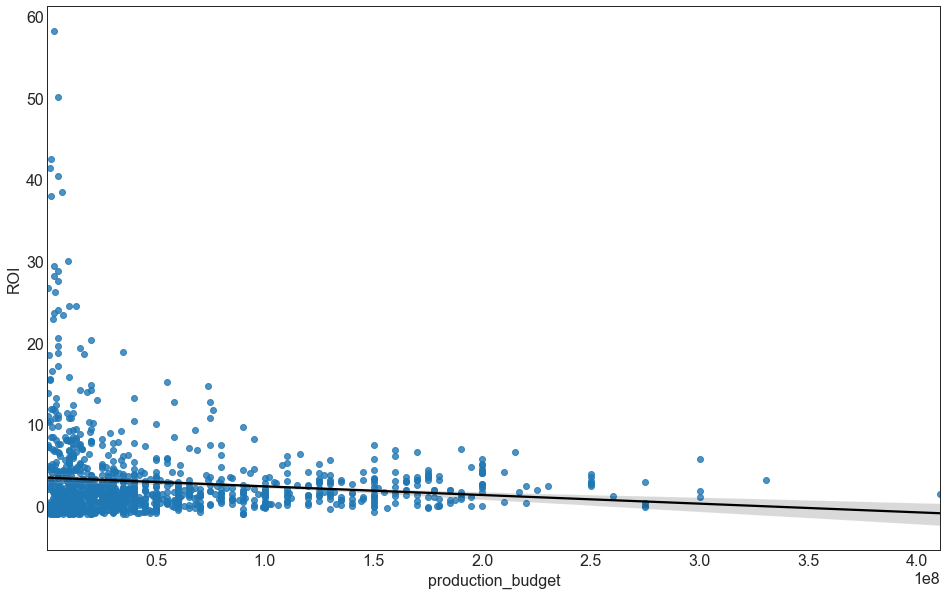

In [13]:
# Questions: Can we see a direct relationship between budget and ROI?
viz.budget_roi(cleaned_data)
# Result: Big budget movies tend to do worse than low budget movies, per $ invested.

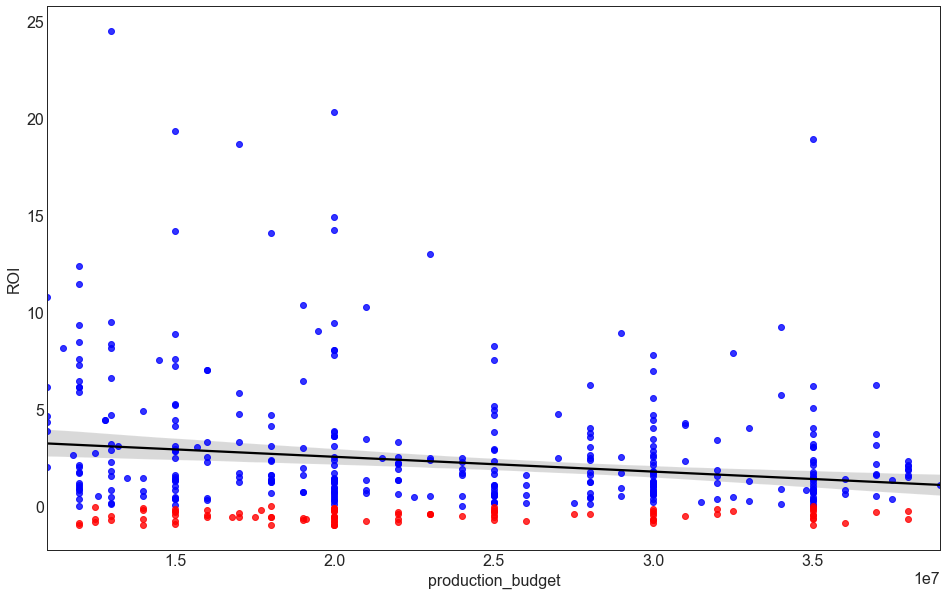

In [14]:
# Assumption: Microsoft is not interested in flooding the market with super low budget movies: Microsoft has the upfront cash to 
# acquire expensive IP which could potentially be turned into more or less guaranteed profit (like Disney), but would need decent budgets to make that money back.
# Let's ignore the cheapest 20% of movies made.
#
# Questions: Excluding the bottom 20% of movies in terms of budget, what is the relationship between budget and ROI
# in the cheapest half of the remaining movies 

# Plot regression line for all movies we're considering now

viz.roi_production_budget_scatter_20(cleaned_data)

# Result: Trend line looks similar (but less severe) to original trend line; more expensive movies do worse, but not by much

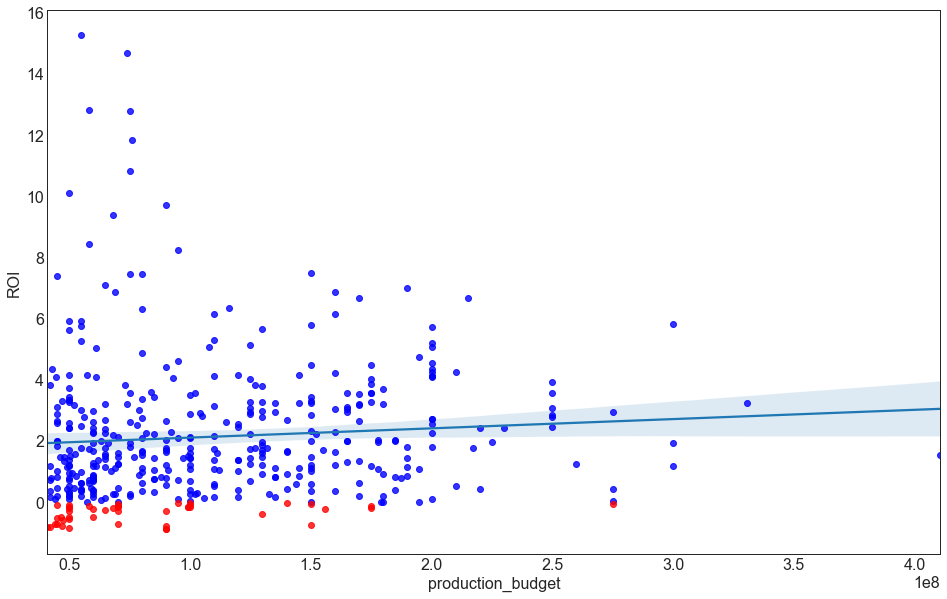

In [15]:
# Questions: Excluding the bottom 20% of movies in terms of budget, what is the relationship between budget and ROI
# in the cheapest half of the remaining movies 

# Plot regression line for all movies we are interested in


viz.roi_production_budget_scatter_60(cleaned_data)


# Result: Trend line reverses! At some point, each additional dollar invested improves ROI on every dollar invested.
# This suggests we could either make a bunch of smaller movies, or else make a big movie, but movies near the 60th percentile are the worst investment.


Text(0.5, 1.0, 'Overall: Profit vs Production Budget Analysis')

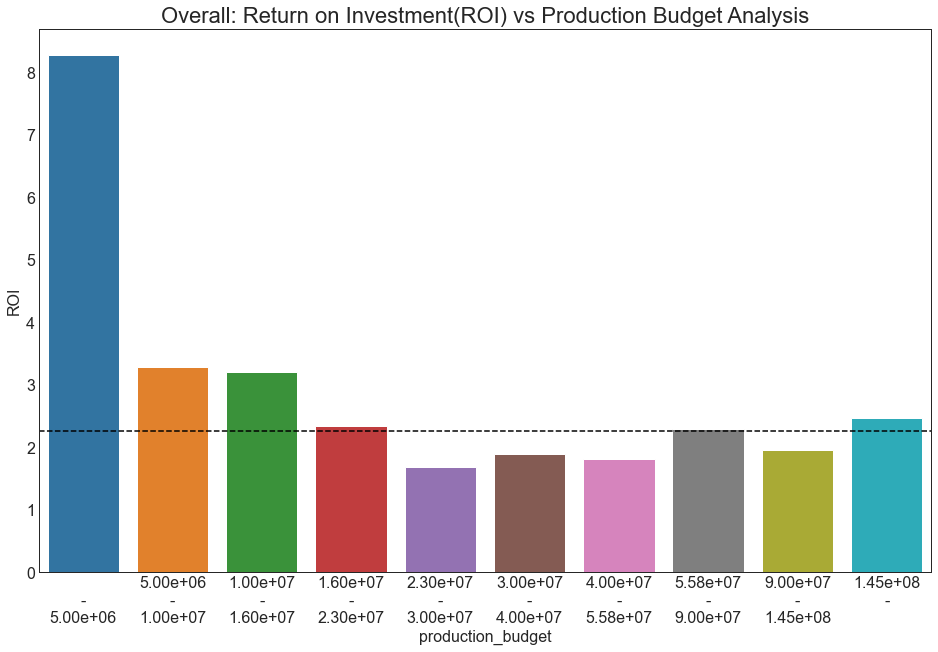

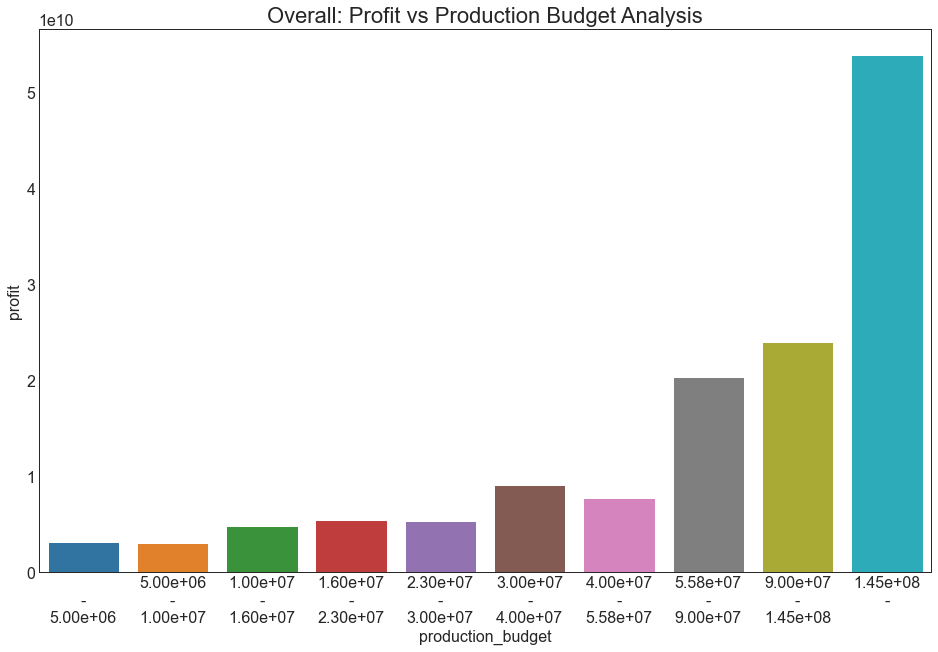

In [16]:
# Questions: Can we flesh out the trend we just identified and make it more solid? 
# Assign data to bins based on production budget quantile

bin_summary, roi_ax, profit_ax = viz.column_quantile_analysis2(cleaned_data, "production_budget", num_quantiles=10, format_string=".2e")
#bin_summary = column_quantile_analysis2(cleaned_data, "production_budget", num_quantiles=10)

bin_summary

roi_ax.set_title("Overall: Return on Investment(ROI) vs Production Budget Analysis")
roi_ax.axhline(viz.calculate_average_roi(cleaned_data), ls='--', color ='black')

profit_ax.set_title("Overall: Profit vs Production Budget Analysis")
#roi_ax.axhline(viz.calculate_average_roi(cleaned_data), ls='--', color ='black')
# Result: Middle of the pack movies are definitely the worst, sporting a ROI of barely 1.2, 
# less than half of what we could get making a movie with a 20-30 percentile budget (ROI 2.6), or a 90-100 percentile budget(ROI 2.5)
# Again, dirt cheap movies tend to be even better, but may worsen our brand.


Text(0.5, 1.0, 'Low Budget: Profit vs Production Budget Analysis')

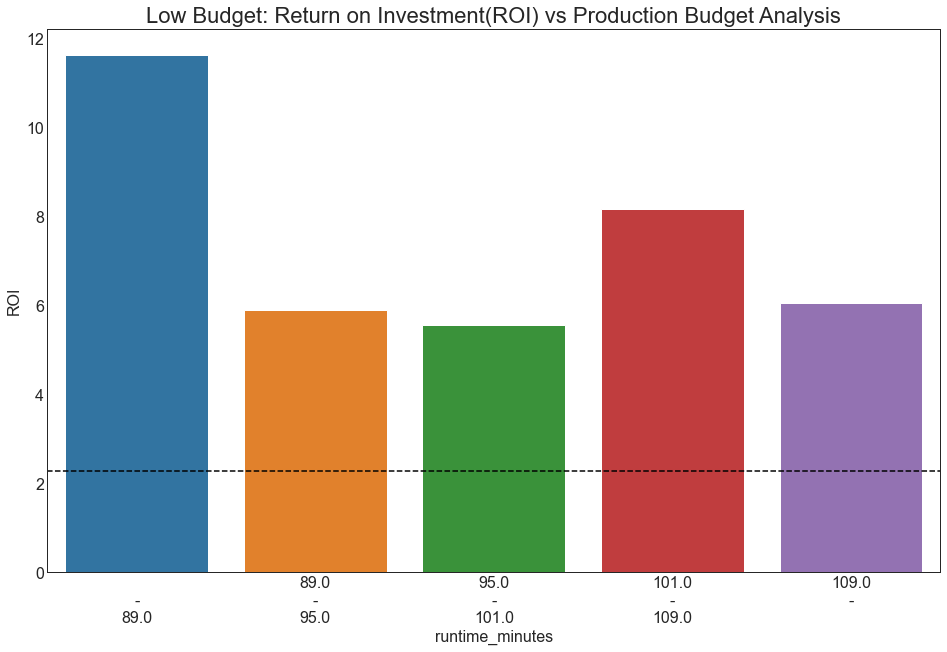

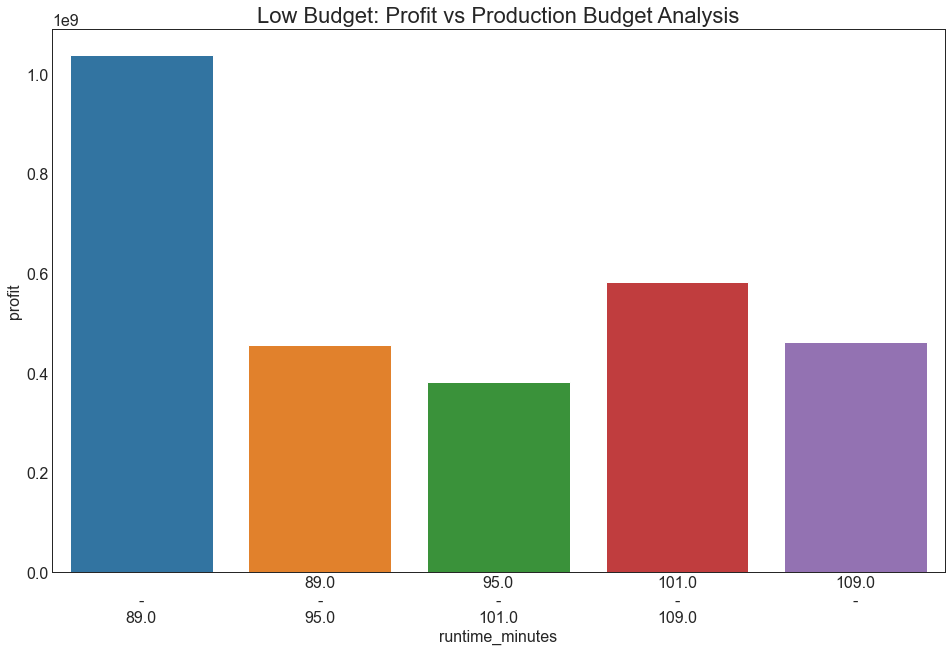

In [17]:
# Low budget movie
# The movie runtime should less than 89 minunts.
bin_summary, roi_ax, profit_ax = viz.column_quantile_analysis2(lb, "runtime_minutes")
bin_summary

roi_ax.set_title("Low Budget: Return on Investment(ROI) vs Production Budget Analysis")
roi_ax.axhline(viz.calculate_average_roi(cleaned_data), ls='--', color ='black')

profit_ax.set_title("Low Budget: Profit vs Production Budget Analysis")

Text(0.5, 1.0, 'High Budget: Profit vs Production Budget Analysis')

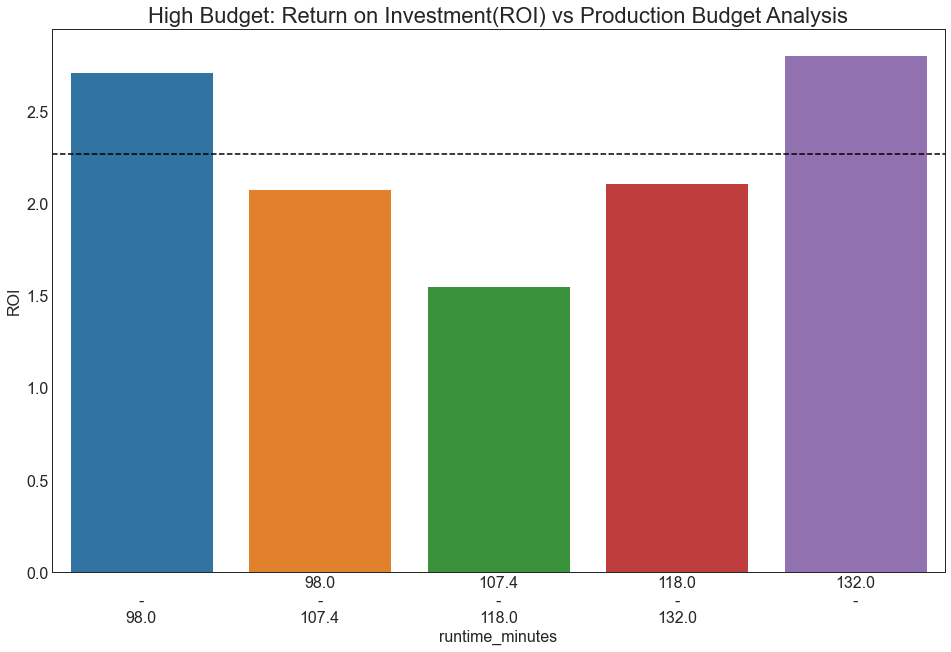

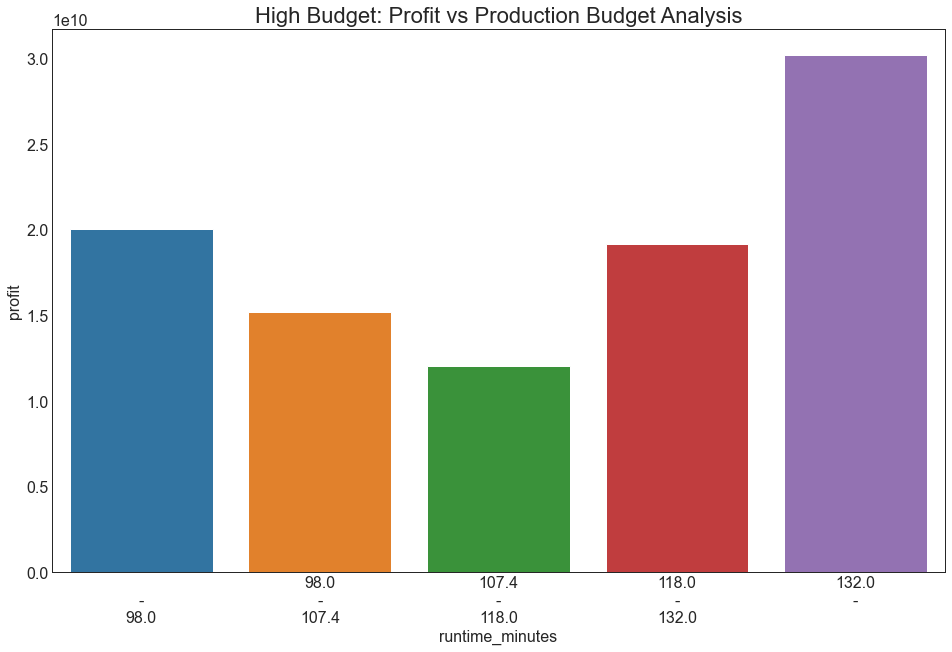

In [18]:
# High budget movie
# The movie should either less than 98 minunts or longer than 132 minunts
bin_summary, roi_ax, profit_ax = viz.column_quantile_analysis2(hb, "runtime_minutes")
bin_summary

roi_ax.set_title("High Budget: Return on Investment(ROI) vs Production Budget Analysis")
roi_ax.axhline(viz.calculate_average_roi(cleaned_data), ls='--', color ='black')

profit_ax.set_title("High Budget: Profit vs Production Budget Analysis")

In [19]:
for title, df in [("all movies", cleaned_data),
                  ("short movies", sm),
                  ("long movies", lm),
                  ("low budget movies", lb),
                  ("high budget movies", hb),
                  ("low budget short movies", lb_sm),
                  ("low budget long movies", lb_lm),
                  ("high budget short movies", hb_sm),
                  ("high budget long movies", hb_lm)
                 ]:
    print(f"Average vote for {title}: {df['vote_average'].median():.2f}")

print("=============================")
for title, df in [("all movies", cleaned_data),
                  ("short movies", sm),
                  ("long movies", lm),
                  ("low budget movies", lb),
                  ("high budget movies", hb),
                  ("low budget short movies", lb_sm),
                  ("low budget long movies",
                   lb_lm),
                  ("high budget short movies", hb_sm),
                  ("high budget long movies", hb_lm)
                 ]:
    print(f"Average ROI for {title}: {viz.calculate_average_roi(df):.2f}")

Average vote for all movies: 6.39
Average vote for short movies: 5.90
Average vote for long movies: 7.00
Average vote for low budget movies: 6.30
Average vote for high budget movies: 6.40
Average vote for low budget short movies: 5.90
Average vote for low budget long movies: 7.10
Average vote for high budget short movies: 6.35
Average vote for high budget long movies: 7.10
Average ROI for all movies: 2.27
Average ROI for short movies: 2.51
Average ROI for long movies: 2.68
Average ROI for low budget movies: 7.62
Average ROI for high budget movies: 2.27
Average ROI for low budget short movies: 11.63
Average ROI for low budget long movies: 6.19
Average ROI for high budget short movies: 2.67
Average ROI for high budget long movies: 2.81


Text(0.5, 1.0, 'Overall Movies: ROI vs Genre')

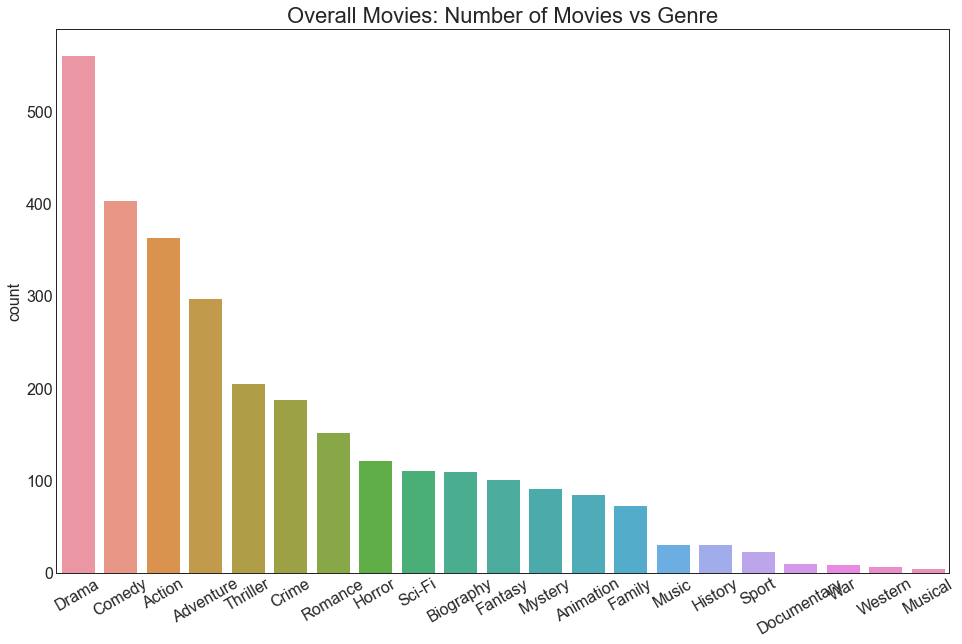

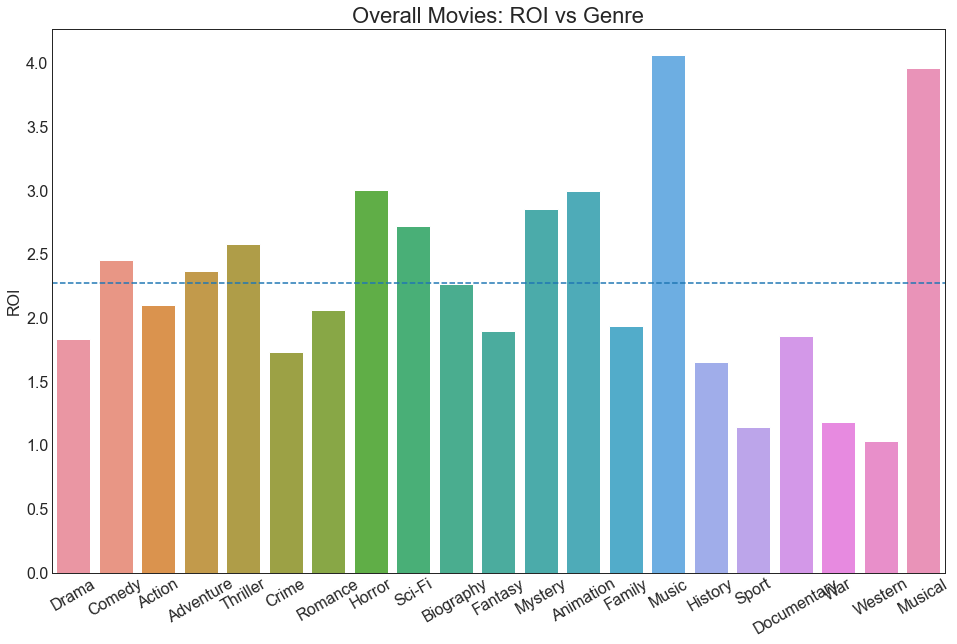

In [20]:
# For all movies, breakdown by genre
count_ax, roi_ax, avg_roi, counts_and_roi_by_genre = viz.genre(cleaned_data[cleaned_data["genres"].notnull()].copy())
count_ax.set_title("Overall Movies: Number of Movies vs Genre")
roi_ax.set_title("Overall Movies: ROI vs Genre")


Text(0.5, 1.0, 'Overall Movies: ROI vs Genre')

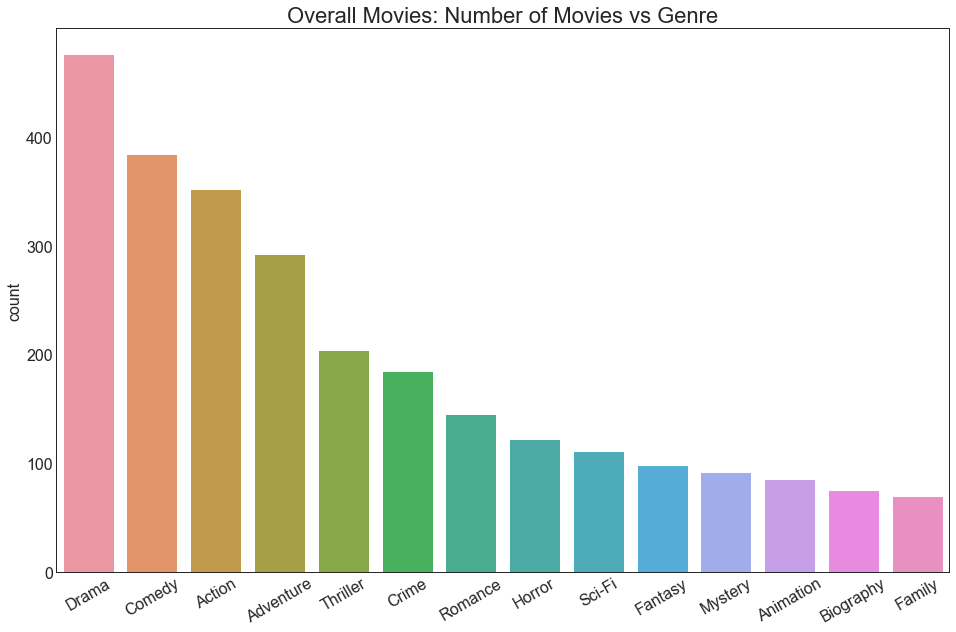

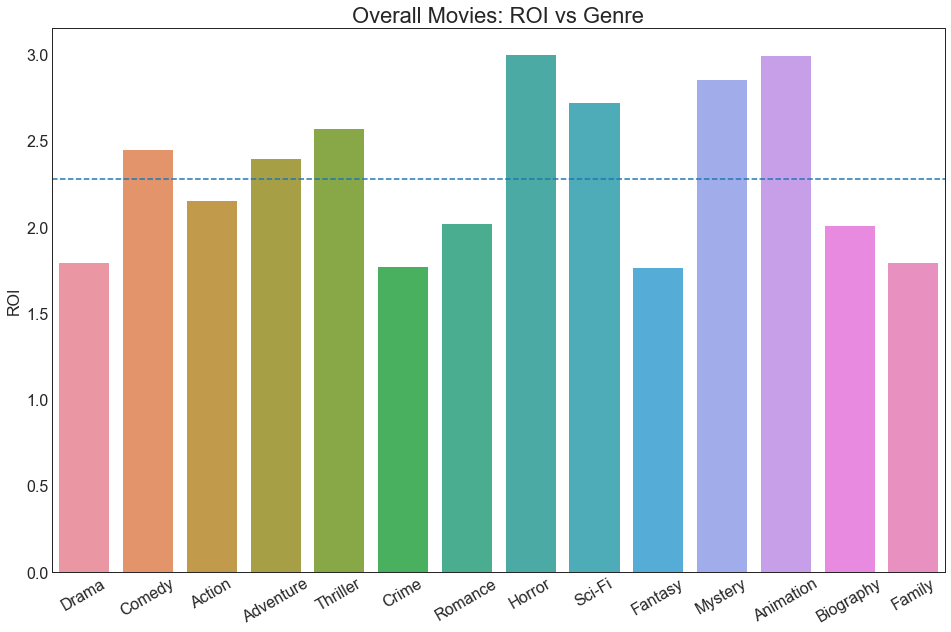

In [21]:
cd_copy = cleaned_data[cleaned_data["genres"].notnull()].copy()
cd_copy2 = cd_copy.copy()
cd_copy["genres"] = cd_copy["genres"].str.split(",")
vcs = cd_copy.explode("genres")["genres"].value_counts()
infrequent_genres = vcs[vcs < 50].index

cd_freq_genres_only = cd_copy2[cd_copy2["genres"].str.contains('|'.join(infrequent_genres))== False]

count_ax, roi_ax, avg_roi, counts_and_roi_by_genre = viz.genre(cd_freq_genres_only.copy())

count_ax.set_title("Overall Movies: Number of Movies vs Genre")
roi_ax.set_title("Overall Movies: ROI vs Genre")

Average ROI across all genres: 2.8058354132154664


,count,ROI
Action,44,2.944853
Adventure,42,2.908519
Drama,24,1.865273
Sci-Fi,24,3.530116
Thriller,10,3.285283
Fantasy,10,2.394768
Mystery,7,1.588441
Crime,6,3.659243
Biography,5,2.446792
Romance,3,1.470493


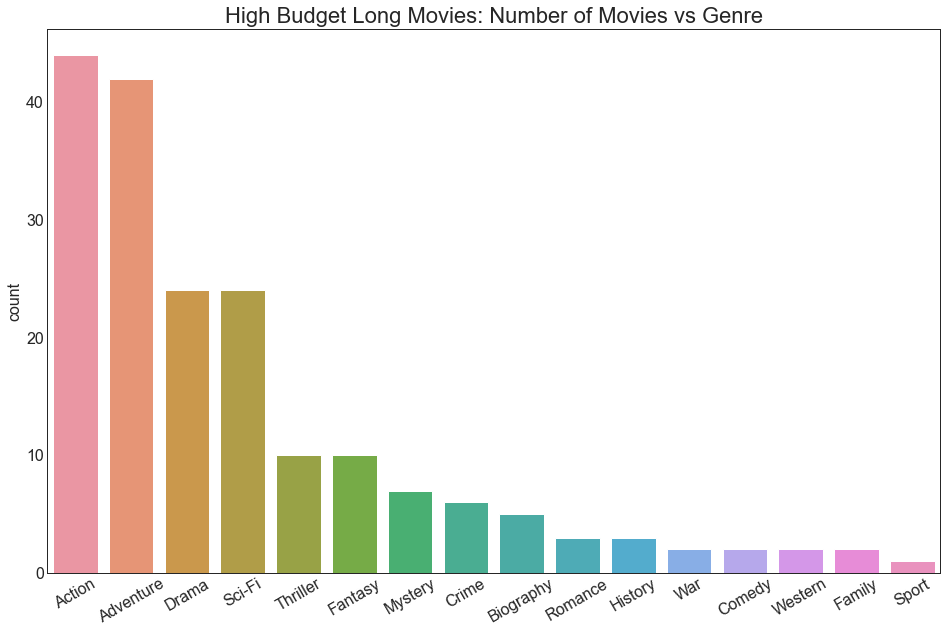

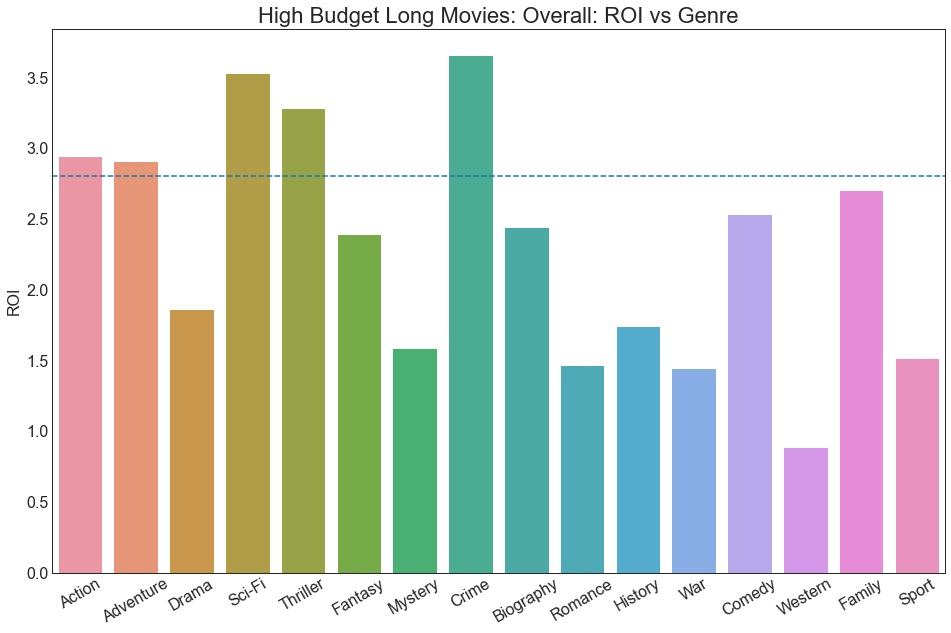

In [22]:
# For long_big_budget_movies, genre
count_ax, roi_ax, avg_roi, counts_and_roi_by_genre = viz.genre(hb_lm.copy())
count_ax.set_title("High Budget Long Movies: Number of Movies vs Genre")
roi_ax.set_title("High Budget Long Movies: Overall: ROI vs Genre")
print("Average ROI across all genres:", avg_roi)
counts_and_roi_by_genre

Average ROI across all genres: 2.6706777090361924


,count,ROI
Comedy,46,2.932967
Adventure,46,2.766522
Animation,44,3.022200
Action,17,1.842089
Family,7,2.330619
Fantasy,4,0.931108
Drama,3,3.801937
Sci-Fi,3,3.093794
Thriller,2,3.239216
Horror,2,1.424792


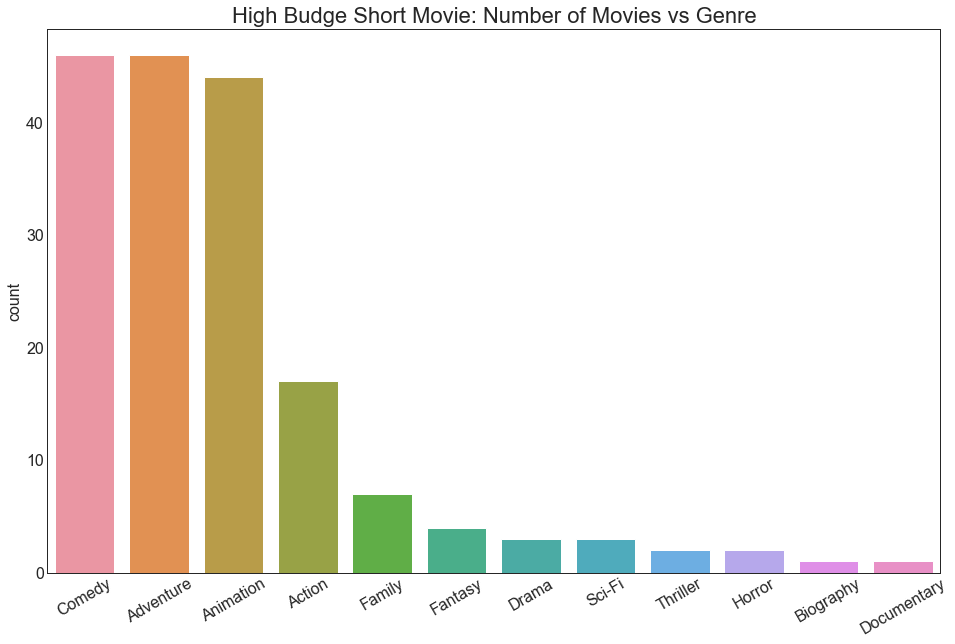

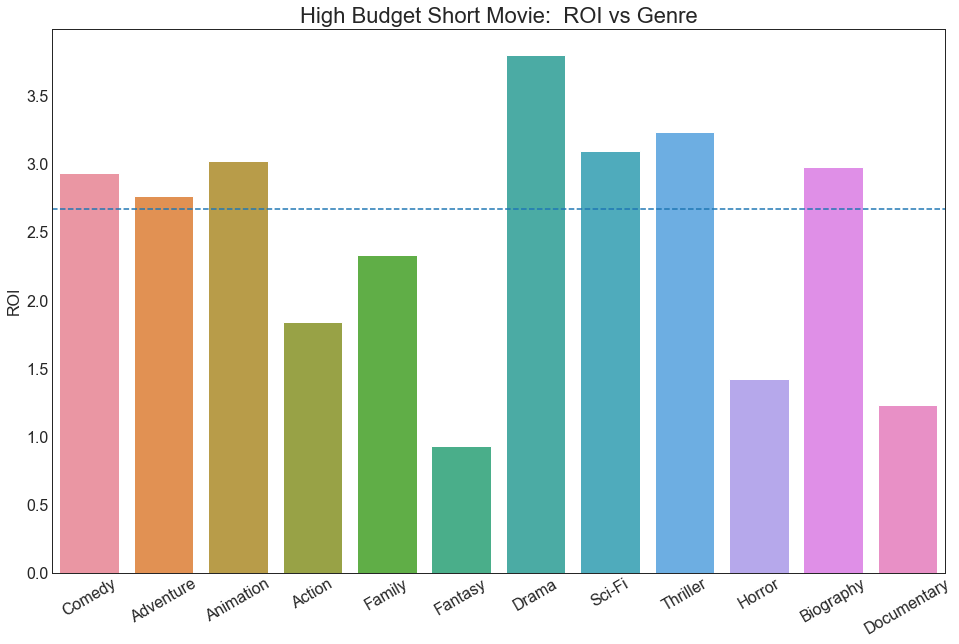

In [23]:
# For short_big_budget_movies, genre
count_ax, roi_ax, avg_roi, counts_and_roi_by_genre = viz.genre(hb_sm.copy())
count_ax.set_title("High Budge Short Movie: Number of Movies vs Genre")
roi_ax.set_title("High Budget Short Movie:  ROI vs Genre")

print("Average ROI across all genres:", avg_roi)
counts_and_roi_by_genre

Average ROI across all genres: 6.191056903225807


,count,ROI
Drama,10,6.191057
Comedy,2,5.105710
Romance,2,5.657013
Adventure,1,-0.253786
Action,1,1.237197
Biography,1,3.749154
Thriller,1,0.046740
Horror,1,0.046740
Sport,1,3.749154
Crime,1,1.237197


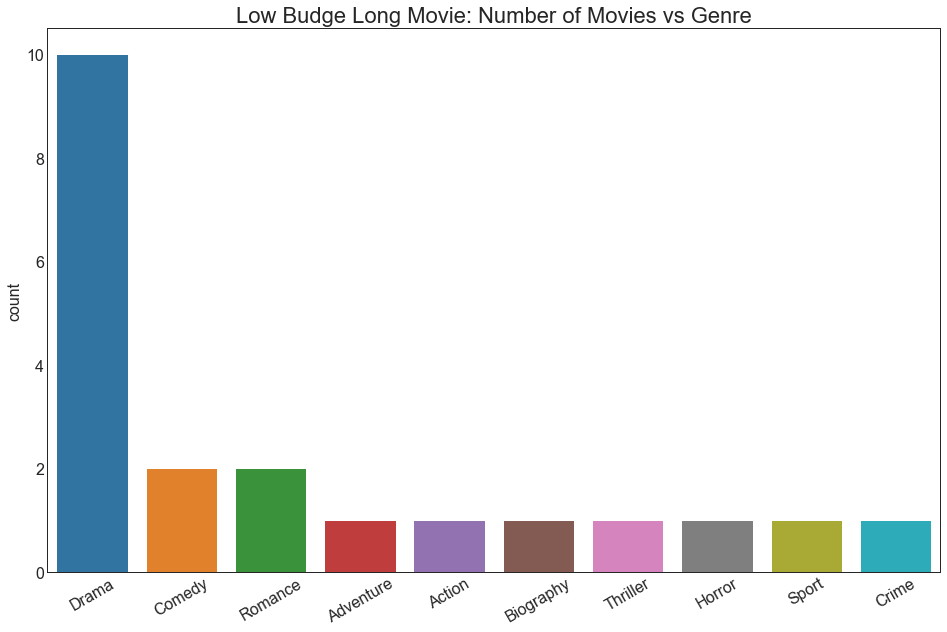

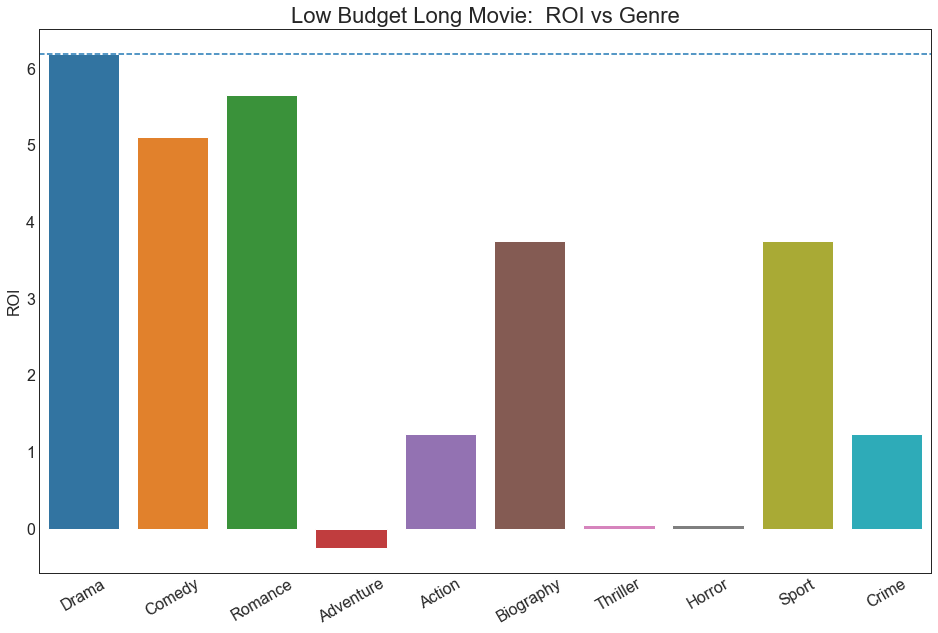

In [24]:
# For Long_low_budget_movies, genre
count_ax, roi_ax, avg_roi, counts_and_roi_by_genre = viz.genre(lb_lm.copy())
count_ax.set_title("Low Budge Long Movie: Number of Movies vs Genre")
roi_ax.set_title("Low Budget Long Movie:  ROI vs Genre")

print("Average ROI across all genres:", avg_roi)
counts_and_roi_by_genre

Average ROI across all genres: 11.625923545861298


,count,ROI
Horror,12,17.100018
Comedy,8,4.851746
Drama,8,8.365030
Thriller,8,22.127037
Mystery,7,20.649913
Romance,4,0.474626
Documentary,2,5.512328
Sci-Fi,2,5.487713
Crime,2,0.064300
Fantasy,2,11.481449


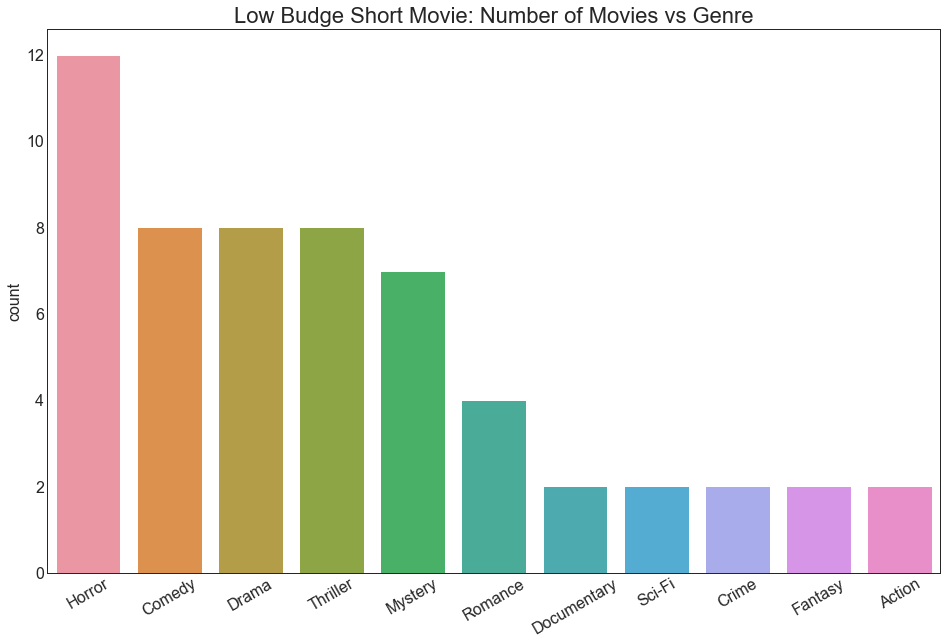

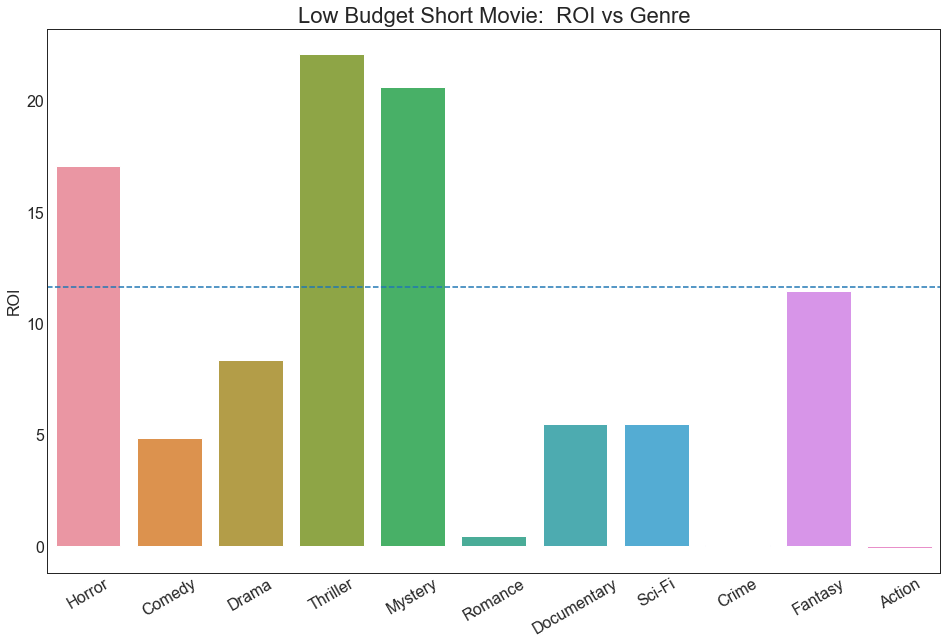

In [25]:
# For short_low_budget_movies, genre
count_ax, roi_ax, avg_roi, counts_and_roi_by_genre = viz.genre(lb_sm.copy())
count_ax.set_title("Low Budge Short Movie: Number of Movies vs Genre")
roi_ax.set_title("Low Budget Short Movie:  ROI vs Genre")

print("Average ROI across all genres:", avg_roi)
counts_and_roi_by_genre

Text(0.5, 1.0, 'Overall: Studio')

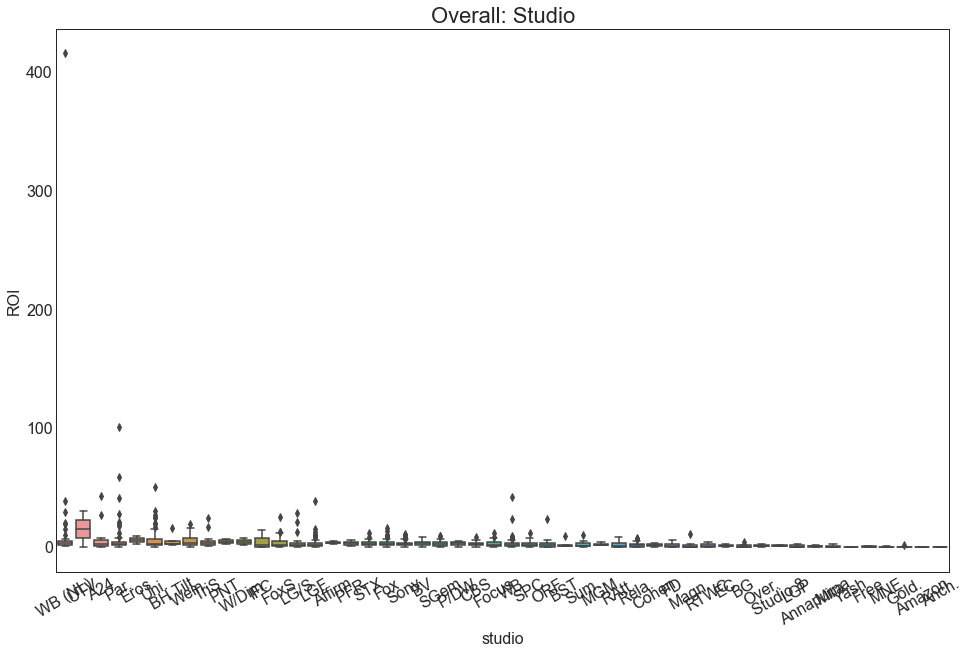

In [26]:
# Studio
boxplot = viz.data_to_plot(cleaned_data)
boxplot.set_title("Overall: Studio")

Text(0.5, 1.0, 'Long Movies: Studio')

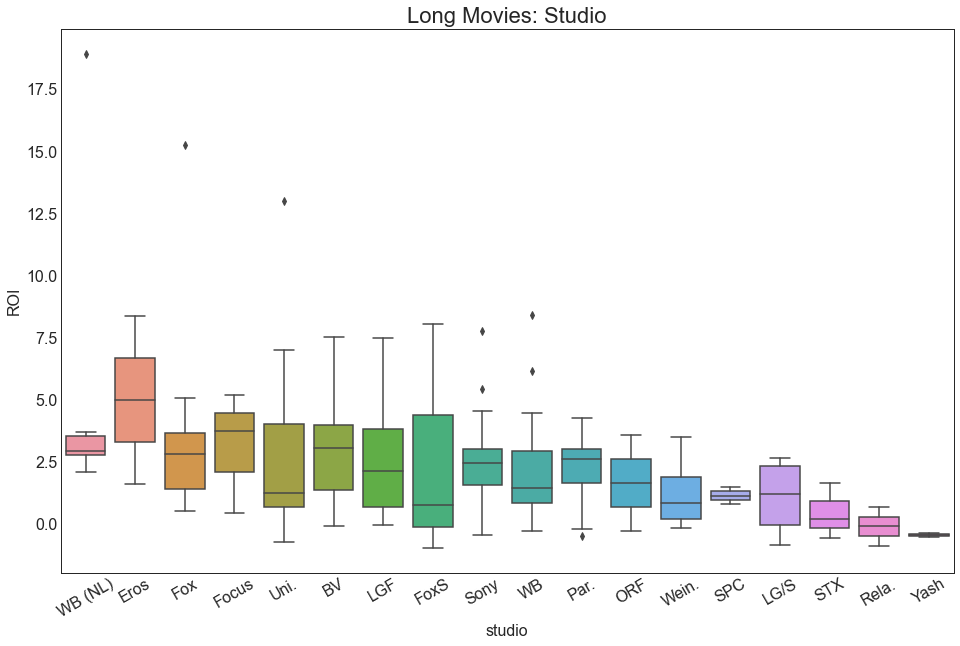

In [27]:
boxplot = viz.data_to_plot(lm)
boxplot.set_title("Long Movies: Studio")

Text(0.5, 1.0, 'Short Movies: Studio')

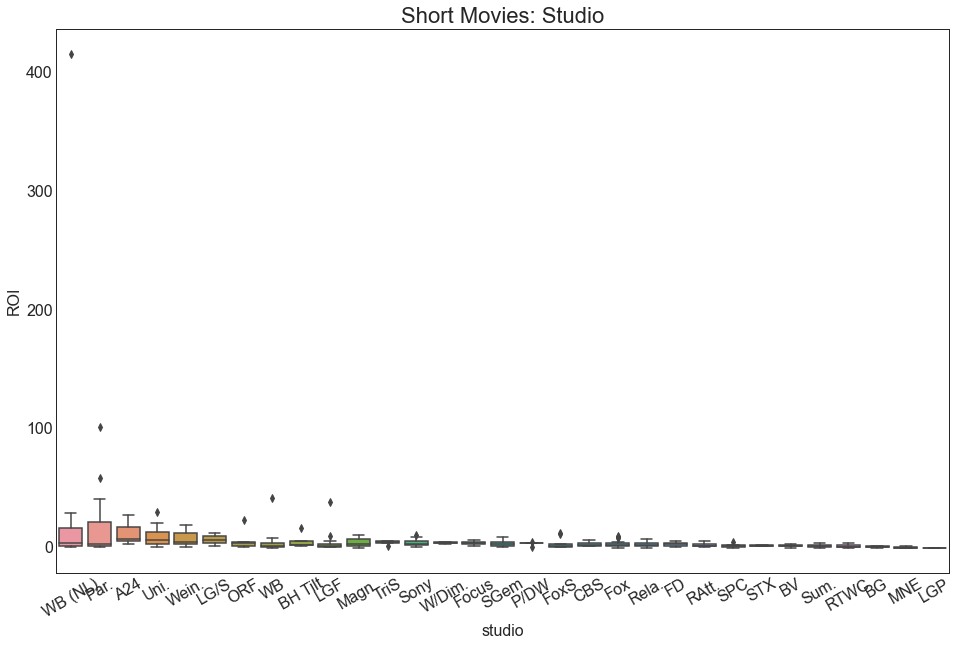

In [28]:
boxplot = viz.data_to_plot(sm)
boxplot.set_title("Short Movies: Studio")

Text(0.5, 1.0, 'High Budget Movies: Studio')

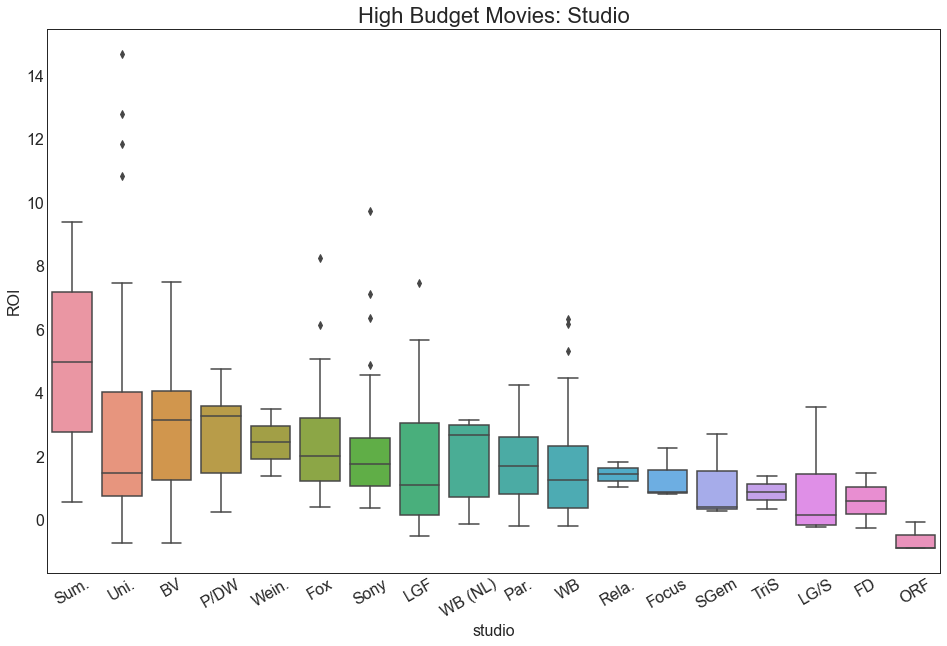

In [29]:
boxplot = viz.data_to_plot(hb)
boxplot.set_title("High Budget Movies: Studio")

Text(0.5, 1.0, 'Low Budget Movies: Studio')

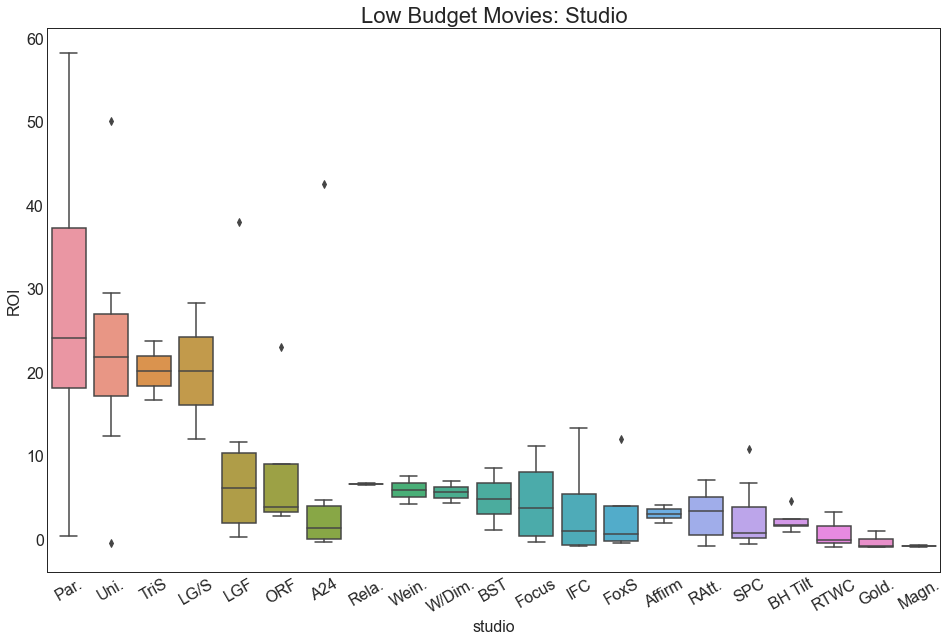

In [30]:
boxplot = viz.data_to_plot(lb)
boxplot.set_title("Low Budget Movies: Studio")

Text(0.5, 1.0, 'High Budget Long Movies: Studio')

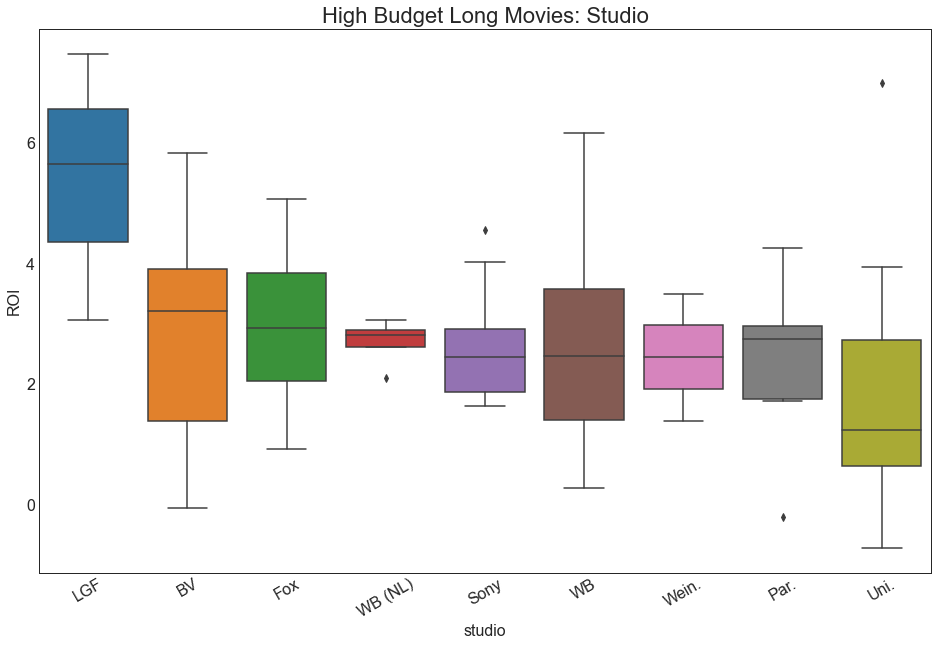

In [31]:
boxplot = viz.data_to_plot(hb_lm)
boxplot.set_title("High Budget Long Movies: Studio")

Text(0.5, 1.0, 'Low Budget Short Movies: Studio')

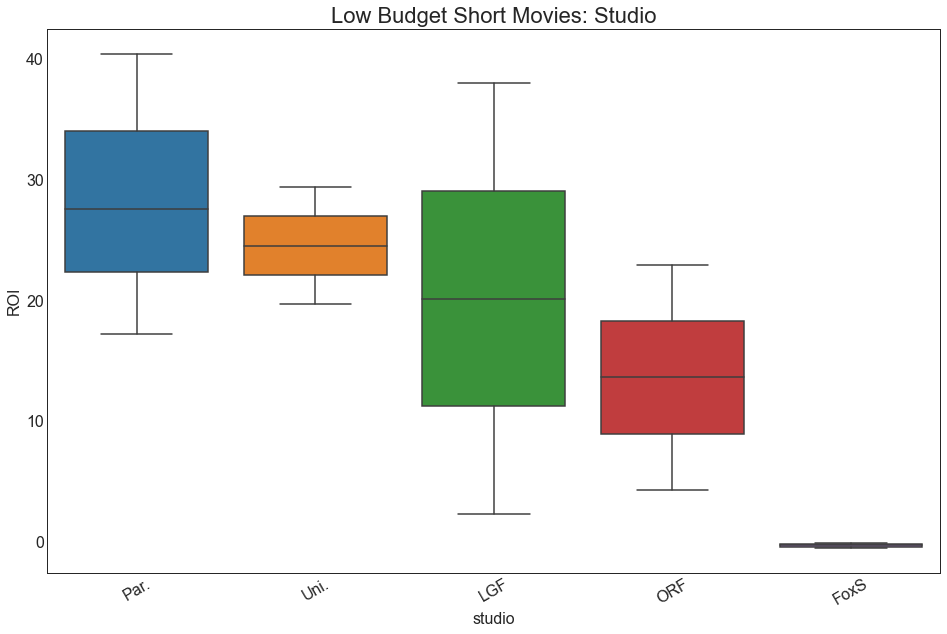

In [33]:
boxplot = viz.data_to_plot(lb_sm)
boxplot.set_title("Low Budget Short Movies: Studio")

In [59]:
hb_lm[["original_title",'studio','runtime_minutes','ROI','profit','averagerating','genres']].sort_values(by=['ROI'],ascending= False).head(10)

,original_title,studio,runtime_minutes,ROI,profit,averagerating,genres
909,The Hunger Games,LGF,142.0,7.474042,597923379,7.2,"Action,Adventure,Sci-Fi"
308,Furious Seven,Uni.,137.0,6.993278,1328722794,7.2,"Action,Crime,Thriller"
81,Aquaman,WB,143.0,6.168092,986894640,7.1,"Action,Adventure,Fantasy"
91,Avengers: Infinity War,BV,149.0,5.827114,1748134200,8.5,"Action,Adventure,Sci-Fi"
121,Black Panther,BV,134.0,5.741291,1148258224,7.3,"Action,Adventure,Sci-Fi"
910,The Hunger Games: Catching Fire,LGF,146.0,5.652831,734868047,7.5,"Action,Adventure,Sci-Fi"
944,The Martian,Fox,144.0,5.067328,547271443,8.0,"Adventure,Drama,Sci-Fi"
327,Gone Girl,Fox,149.0,5.042085,307567189,8.1,"Drama,Mystery,Thriller"
1058,Transformers: Dark of the Moon,P/DW,154.0,4.763028,928790543,6.2,"Action,Adventure,Sci-Fi"
727,Skyfall,Sony,143.0,4.552635,910526981,7.8,"Action,Adventure,Thriller"


In [60]:
lb_sm[["original_title",'studio','runtime_minutes','ROI','profit','averagerating','genres']].sort_values(by=['ROI'],ascending= False).head(10)

,original_title,studio,runtime_minutes,ROI,profit,averagerating,genres
599,Paranormal Activity 3,Par.,83.0,40.407969,202039844,5.8,"Horror,Mystery,Thriller"
928,The Last Exorcism,LGF,87.0,37.981056,68365900,5.6,"Drama,Horror,Thriller"
978,The Purge,Uni.,85.0,29.422194,88266581,5.7,"Horror,Thriller"
481,Lights Out,WB (NL),81.0,28.761302,143806510,6.3,"Drama,Horror,Mystery"
600,Paranormal Activity 4,Par.,88.0,27.563598,137817992,4.6,"Horror,Mystery,Thriller"
19,A Haunted House,ORF,86.0,22.969023,57422558,5.1,"Comedy,Fantasy"
587,Ouija,Uni.,89.0,19.660126,98300632,4.5,"Horror,Mystery,Thriller"
602,Paranormal Activity: The Marked Ones,Par.,84.0,17.180971,85904854,5.0,"Horror,Mystery,Thriller"
443,Kevin Hart: Let Me Explain,LG/S,75.0,11.930902,29827255,6.8,"Comedy,Documentary"
933,The Lazarus Effect,Rela.,83.0,6.671862,33359310,5.2,"Horror,Mystery,Sci-Fi"


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
 * Perform regressions on ROI vs genre, runtime, and budget, identify the optimal choices, and repeat using other metrics until we come to a full recommendation on what type of move to make.
* How did you iterate on your initial approach to make it better?
 * We examined many different slices of the data and visualizations until we found significant results. Discovering and fixing data cleaning and quality issues ended up changing our results significantly from the start to the end of the analysis process, so it's hard to say what modelling changes had a large impact.
* Why are these choices appropriate given the data and the business problem?
 * Microsoft has a lot of capital, but also lots of other expenses. We analyzed the data with multiple target variables in mind to enable them to make a good decision no matter how much capital they want to invest, how profitable their other investment opportunities are, or how much they think their movie studio's brand might influence the "Microsoft" brand (for better or worse).
***

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* * We identified movie types that vastly outperform average movies on all key metrics, which is a great result for shaping studio policy.
* How well does your model fit your data? How much better is this than your baseline model?
* * We don't have real "models" yet. Summary statistics indicate our recommendations should increase expected profit, ROI, and vote average beyond making generic movie.
* How confident are you that your results would generalize beyond the data you have?
* * Very confident.
* How confident are you that this model would benefit the business if put into use?
* * Very confident.
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
*“Middle of the Road” movies are the worst across all metrics: 
** Make a low-budget (for best ROI) or high budget (for best profit, best ratings, good ROI) movie, not a middle budget movie
** Make a movie that is either long or short, not medium length
* Pick Genre that suits budget and length:
* * Horror/Thriller for Low Budget/Short Movies
* * Sci-Fi/Thriller for High Budget/Long Movies
* Intellectual Property seems important for successful High Budget/Long Movies
* * We did not fully explore this relationship due to limited data about IP costs; would recommend obtaining this data and re-analyzing
* * Acquire movie rights for comic book superheroes or popular books.
* Further Research
* * We can help analyze directors/writers/actors within a certain genre/budget/runtime once you make a decision!

***